#**GRASS GIS Introduction**

###### **GRASS GIS**, often simply called GRASS (Geographic Resources Analysis Support System), stands as one of the pioneering free and open-source Geographic Information System (GIS) software suites. It boasts a comprehensive collection of approximately 500 modules, serving diverse purposes such as geospatial data management, analysis, image processing, graphics, map production, spatial modeling, and visualization. Over the years, GRASS has evolved into a powerful tool for handling various aspects of geographic information and analysis in the realm of open-source software.

---



<img src='https://drive.google.com/uc?id=1C3BkqayXM4aBu0GZAEr30gz3cRycKOIl'>


The main component of the Data tab is the Data Catalog which shows the GRASS GIS hierarchical structure consisting of Database, Location and Mapset.

<img src='https://drive.google.com/uc?id=1JjgObR35KbLy2b7J2FZISUmrY3qyPNQC'> **GRASS Database (directory with projects)**

*   Running GRASS GIS for the first time, a folder named "grassdata" is automatically created. Depending on your operating system, you can find it in your $HOME directory (*nix) or My Documents (MS Windows).

<img src='https://drive.google.com/uc?id=1RA8E8Xunn1yf77ZNrEIK9fZCOHmEDx7h'> **Location (a project)**

*   A Location is defined by its coordinate reference system (CRS). In the case of the default Location, it is a geographic coordinate reference system WGS84 (EPSG:4326). If you have data in another CRS than WGS84, you should create a new Location corresponding to your system.

<img src='https://drive.google.com/uc?id=1T26cbFZ1HP5xE3xrj97u6aIMSR11jiV8'> **Mapset (a subproject)**

*   Each Location can have many Mapsets for managing different aspects of a project or project's subregions. When creating a new Location, GRASS GIS automatically creates a special Mapset called PERMANENT where the core data for the project can be stored.



For more info about data hierarchy;

---



<img src='https://drive.google.com/uc?id=1VavWK8pUuEVSmi-mtmmAnh2vPlaHHb5C'>

One motivation to maintain different MAPSETs is to store maps related to project issues or subregions. Another motivation is to support simultaneous access of several users to the map layers stored within the same LOCATION, i.e. teams working on the same project.

The **PERMANENT MAPSET** is useful for providing general spatial data (e.g. an elevation model), accessible but write-protected to all users who are working in the same LOCATION as the database owner.

###### **GRASS GIS Modules Structure**

GRASS GIS has a modular structure for it's tools, they are divided in several classes depending on the main topic of the tool.

---



Prefix | Function | Example
------ | -------- | -------
r.* | raster processing | r.mapcalc: map algebra
v.*	| vector processing	| v.clean: topological cleaning
i.*	| imagery processing | i.segment: object recognition
db.* | database management | db.select: select values from table
r3.* | 3D raster processing | r3.stats: 3D raster statistics
t.* | temporal data processing | t.rast.aggregate: temporal aggregation
g.* | general data management | g.rename: renames map
d.* | display | d.rast: display raster map

***The GRASS Region;***

The importance of the **"region"** concept in GRASS GIS lies in its role as a fundamental component for spatial data analysis and manipulation within the software. In GRASS GIS, a region defines the extent, resolution, and alignment of the spatial data that will be processed in a given analysis. It serves as a spatial reference framework, allowing users to focus their analysis on specific geographic areas and control the granularity of their results.

The definition of a region is crucial for ensuring consistency and accuracy in spatial analyses. It allows users to standardize the spatial parameters for different data layers, ensuring that they align properly during overlay operations and other spatial computations. Example;

*g.region -p*

Print current region settings.

### **Environment installation and Data Preperation ;**

In [1]:
%%bash
# install dependencies
# Add the Ubuntu GIS repository
DEBIAN_FRONTEND=noninteractive sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable && apt update && apt install grass subversion grass-dev parallel libglu1-mesa-dev xvfb && apt remove libproj22
#apt update  # Update package information
#apt install grass subversion grass-dev parallel libglu1-mesa-dev xvfb  # Install required packages
#apt remove libproj22  # Remove a specific package

# Install PyVirtualDisplay Python library
pip install PyVirtualDisplay

# Change to the home directory
cd ~

# Download sample data for Grass GIS

# Create a directory for Grass GIS data
mkdir -p grassdata
# Download sample data
curl -SL https://grass.osgeo.org/sampledata/north_carolina/nc_spm_08_grass7.zip > nc_spm_08_grass7.zip
# Unzip the downloaded file quietly
unzip -qq nc_spm_08_grass7.zip
# Move the extracted data to the grassdata directory
mv nc_spm_08_grass7 grassdata

rm nc_spm_08_grass7.zip

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,713 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,671 kB]
Get:13 https://ppa.launchpadcontent.net/ubuntugis/u







  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  140M  100  140M    0     0  42.3M      0  0:00:03  0:00:03 --:--:-- 42.3M


In [2]:
# This Python script uses the os module to navigate and manipulate the file system.
# It changes the current working directory to the user's home directory.
# Note: The actual functionality beyond changing the directory is not provided in this snippet.
import os
os.chdir(os.path.expanduser("~"))

# Python API

## 3. GRASS & Python

### Python package `grass.script`

The **grass.script** or GRASS GIS Python Scripting Library provides functions for calling GRASS modules within Python scripts. The most commonly used functions include:

- `run_command`: used when the output of the modules is a raster or vector, no text type output is expected
- `read_command`: used when the output of the modules is of text type
- `parse_command`: used with modules whose output can be converted to `key=value` pairs
- `write_command`: used with modules that expect text input, either in the form of a file or from stdin

It also provides several wrapper functions for frequently used modules, for example:

- To get info from a raster, script.raster.raster_info() is used: `gs.raster_info('dsm')`
- To get info of a vector, script.vector.vector_info() is used: `gs.vector_info('roads')`
- To list the raster in a location, script.core.list_grouped() is used: `gs.list_grouped(type=['raster'])`
- To obtain the computational region, script.core.region() is used: `gs.region()`

### Part 1: Unsupervised Classification

In this example we will show how can you use grass-python API for maximum-likelihood unsupervised classification by using signature. We show two classification modules: [i.cluster](https://grass.osgeo.org/grass83/manuals/i.cluster.html) and [i.maxlik](https://grass.osgeo.org/grass83/manuals/i.maxlik.html).

Let's create our mapset for unsupervised classification

In [3]:
%%bash
grass -c -e ~/grassdata/nc_spm_08_grass7/unsupervise_classification

Creating new GRASS GIS mapset <unsupervise_classification>...


In [5]:
# Import Python standard library and IPython packages we need.
import subprocess
import sys

# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
gj.init("~/grassdata", "nc_spm_08_grass7", "unsupervise_classification")

In [11]:
# Get info about your mapset
gs.gisenv()

{'GISDBASE': '/root/grassdata',
 'LOCATION_NAME': 'nc_spm_08_grass7',
 'MAPSET': 'unsupervise_classification'}

#### Data Preparation

Imagery group holds a group of raster, usually different bands which will be our case, too. Subgroups works in the same way as groups and are used to organize rasters inside a group. Now, use i.group to register Landsat images to a group and subgroup with the same name:

In [12]:
# List the raster maps we have
maps = gs.list_grouped(type="raster", pattern="lsat*0$")["PERMANENT"]
print(maps)
gs.run_command("i.group", group="landsat", subgroup="landsat", input=maps)
# or determine your input as "input=lsat7_2002_10,lsat7_2002_20,lsat7_2002_30,lsat7_2002_40,lsat7_2002_50,lsat7_2002_70"

['lsat7_2002_10', 'lsat7_2002_20', 'lsat7_2002_30', 'lsat7_2002_40', 'lsat7_2002_50', 'lsat7_2002_70', 'lsat7_2002_80']


Set your computational area!

In [13]:
gs.run_command("g.region", raster="lsat7_2002_10")

Now, generate spectral signatures using a clustering algorithm. It is not needed to specify all the rasters, we just refer to them using group and subgroup. The signatures are stored within the subgroup.  Imagery &rarr; Classify image &rarr; Clustering input for unsupervised classification <code>i.cluster</code>


In [14]:
gs.run_command("i.cluster", group="landsat",subgroup="landsat",signaturefile="sig_cluster_lsat2002",classes=10)

Now we have signatures which can be used for a maximum-likelihood classification:

In [15]:
gs.run_command("i.maxlik", group="landsat", subgroup="landsat" ,signaturefile="sig_cluster_lsat2002", output="lsat7_2002_cluster_classes")

Look at the result!!!

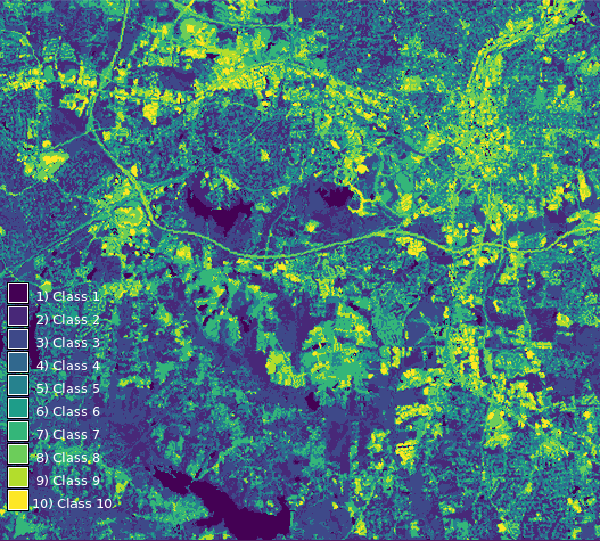

In [23]:
unsup_map = gj.Map()
unsup_map.d_rast(map="lsat7_2002_cluster_classes")
unsup_map.d_legend(raster="lsat7_2002_cluster_classes", at=(2, 50, 1, 5),color="white")
unsup_map.show()

### Part 2: Image Segmentation
In this example we will schow segmentation of Landsat scene. We show two segmentation modules: [i.segment](https://grass.osgeo.org/grass-stable/manuals/i.segment.html) and the addon [i.superpixels.slic](https://grass.osgeo.org/grass-stable/manuals/addons/i.superpixels.slic.html). Note that each segmentation algorithm is designed for different purpose, so we can't directly compare them.

First, let's create a new mapset *segmentation* in nc_spm_08_grass7 location:

In [24]:
%%bash
grass -c -e ~/grassdata/nc_spm_08_grass7/segmentation

Creating new GRASS GIS mapset <segmentation>...


In [25]:
# Start GRASS Session and switch our mapset
gj.init("~/grassdata", "nc_spm_08_grass7", "segmentation")

In [26]:
# Get info about your mapset
gs.gisenv()
# Check current mapset
# print(gs.read_command("g.mapset", flags="p"))

{'GISDBASE': '/root/grassdata',
 'LOCATION_NAME': 'nc_spm_08_grass7',
 'MAPSET': 'segmentation'}

In [27]:
gs.run_command("g.extension", extension="i.superpixels.slic")

#### Data Preparation
Imagery modules typically work with imagery groups. We first list the landsat raster data and then create an imagery group:

In [28]:
maps = gs.list_grouped(type="raster", pattern="lsat*")["PERMANENT"]
print(maps)
gs.run_command("i.group", group="landsat", subgroup="landsat", input=maps)

['lsat7_2002_10', 'lsat7_2002_20', 'lsat7_2002_30', 'lsat7_2002_40', 'lsat7_2002_50', 'lsat7_2002_61', 'lsat7_2002_62', 'lsat7_2002_70', 'lsat7_2002_80']


Next, we derive NDVI to see some of the effects of segmentation:

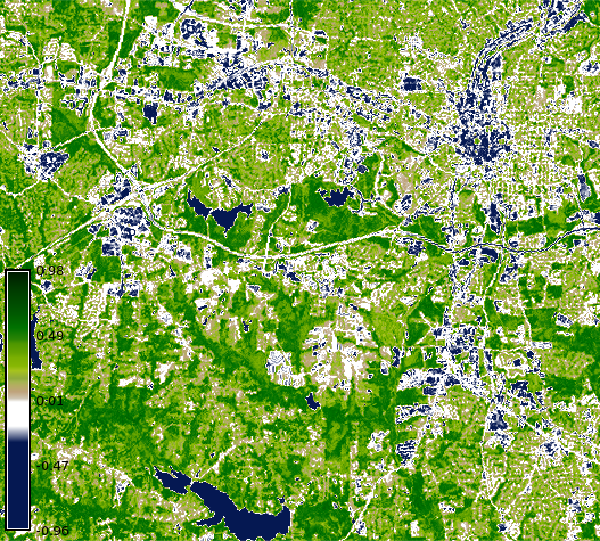

In [29]:
gs.run_command("g.region", raster="lsat7_2002_10")
gs.run_command("i.vi", red="lsat7_2002_30",  nir="lsat7_2002_40", output="ndvi", viname="ndvi")

ndvi_map = gj.Map()
ndvi_map.d_rast(map="ndvi")
ndvi_map.d_legend(raster="ndvi", at=(2, 50, 1, 5))
ndvi_map.show()

#### Segmentation with i.superpixels.slic

Superpixels can be defined as a group of pixels that share common characteristics and are useful in computer vision and image processing. Here we run [i.superpixels.slic](https://grass.osgeo.org/grass-stable/manuals/addons/i.superpixels.slic.html) and convert the resulting raster to vector for better visualization.

In [30]:
gs.run_command("i.superpixels.slic", input="landsat", output="superpixels", num_pixels=1000, compactness=0.5)
gs.run_command("r.to.vect", input="superpixels", output="superpixels", type="area")

You can play with compactness and num_pixels parameters and see how the resulting segmentation changes:



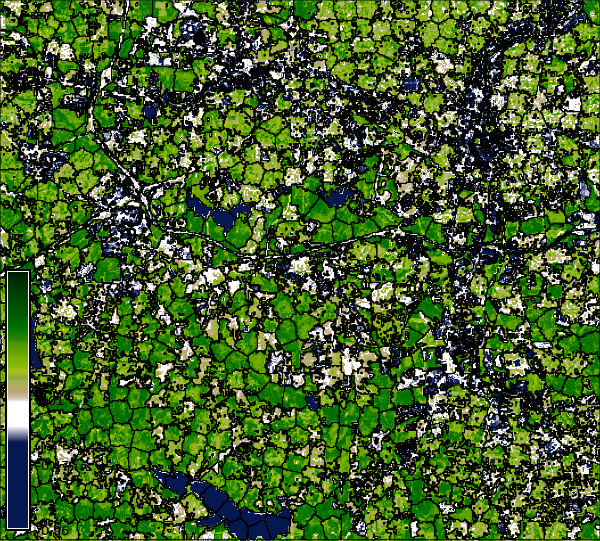

In [31]:
superpixels_map = gj.Map()
superpixels_map.d_rast(map="ndvi")
superpixels_map.d_vect(map="superpixels", width=1, color="black", fill_color="none")
superpixels_map.d_legend(raster="ndvi", at=(2, 50, 1, 5))
superpixels_map.show()

For fun, let's do zonal statistics on the results. We compute the median NDVI value within each segment:

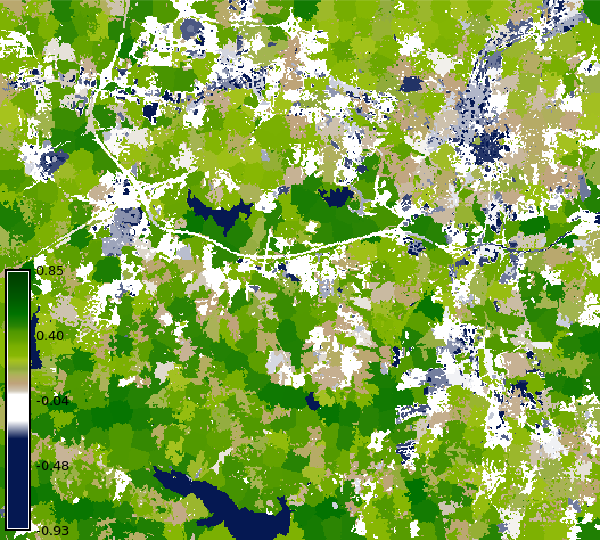

In [32]:
gs.run_command("r.stats.quantile", base="superpixels", cover="ndvi", output="superpixels_ndvi")

superpixels_map = gj.Map()
superpixels_map.d_rast(map="superpixels_ndvi")
superpixels_map.d_legend(raster="superpixels_ndvi", at=(2, 50, 1, 5))
superpixels_map.show()

#### Segmentation with i.segment
Next, we do the same, but with i.segment to see the different behavior. Note that i.segment uses region growing algorithm by default, but mean shift is also available:

In [33]:
gs.run_command("i.segment", group="landsat", output="segments", threshold=0.5, minsize=50)
gs.run_command("r.to.vect", input="segments", output="segments", type="area")

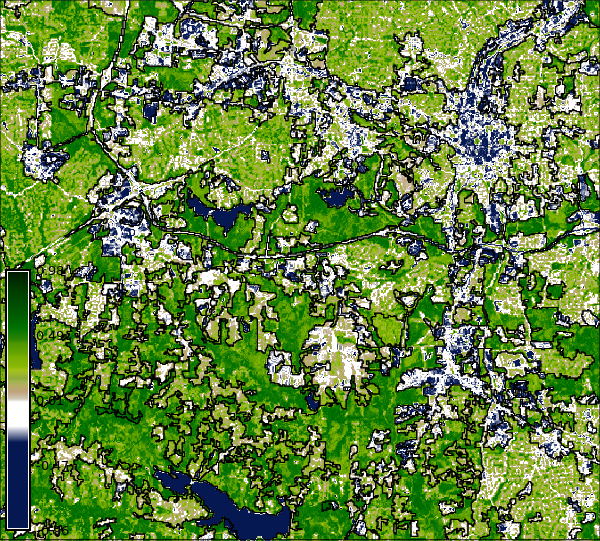

In [34]:
segments_map = gj.Map()
segments_map.d_rast(map="ndvi")
segments_map.d_vect(map="segments", width=1, color="black", fill_color="none")
segments_map.d_legend(raster="ndvi", at=(2, 50, 1, 5))
segments_map.show()

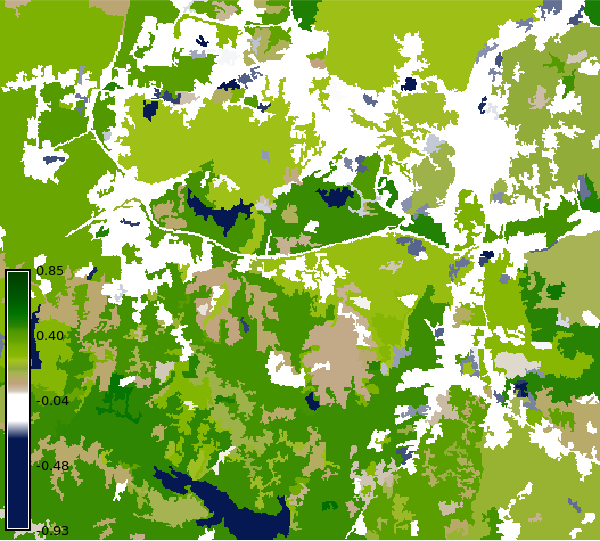

In [35]:
gs.run_command("r.stats.quantile", base="segments", cover="ndvi", output="segments_ndvi")

segments_map = gj.Map()
segments_map.d_rast(map="segments_ndvi")
segments_map.d_legend(raster="superpixels_ndvi", at=(2, 50, 1, 5))
segments_map.show()